# Tutorial 1: Processing data

Written by KN, Feb-2017

Ammended slightly from: http://localhost:8888/tree/General_code/deepLearning/Kadenze_tutorial/CADL/session-1

In [10]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import urllib
import urllib2
import zipfile
import os
plt.style.use('ggplot')

### Util functions for getting images, etc

In [28]:
def get_celeb_files(saveDir, numImgs):
    """Downloads the first 100 images of the celeb dataset.

    Files will be placed in a directory 'saveDir' if one
    doesn't exist.

    Returns
    -------
    files : list of strings
        Locations to the first 100 images of the celeb net dataset.
    """
    # Create a directory
    if not os.path.exists(saveDir):
        os.mkdir(saveDir)

    # Now perform the following 100 times:
    for img_i in range(1, numImgs+1):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i
        
        if os.path.exists(saveDir+f):
            continue

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url)#, end='\r')

        # And now download the url to a location inside our new directory
        urllib.urlretrieve(url, os.path.join(saveDir, f))

    files = [os.path.join(saveDir, file_i)
             for file_i in os.listdir(saveDir)
             if '.jpg' in file_i]
    return files


def get_celeb_imgs(saveDir, numImgs):
    """Loads the first numImgs images of the celeb dataset.

    Returns
    -------
    imgs : list of np.ndarray
        List of the first 100 images from the celeb dataset
    """
    return [plt.imread(f_i) for f_i in get_celeb_files(saveDir, numImgs)]

In [18]:
# Get image files
saveDir = '/Users/kateniehaus/Dropbox/machine learning/Deep/Kadenze'
numImgs = 100
files = get_celeb_files(saveDir, numImgs)

https://s3.amazonaws.com/cadl/celeb-align/000001.jpg
https://s3.amazonaws.com/cadl/celeb-align/000002.jpg
https://s3.amazonaws.com/cadl/celeb-align/000003.jpg
https://s3.amazonaws.com/cadl/celeb-align/000004.jpg
https://s3.amazonaws.com/cadl/celeb-align/000005.jpg
https://s3.amazonaws.com/cadl/celeb-align/000006.jpg
https://s3.amazonaws.com/cadl/celeb-align/000007.jpg
https://s3.amazonaws.com/cadl/celeb-align/000008.jpg
https://s3.amazonaws.com/cadl/celeb-align/000009.jpg
https://s3.amazonaws.com/cadl/celeb-align/000010.jpg
https://s3.amazonaws.com/cadl/celeb-align/000011.jpg
https://s3.amazonaws.com/cadl/celeb-align/000012.jpg
https://s3.amazonaws.com/cadl/celeb-align/000013.jpg
https://s3.amazonaws.com/cadl/celeb-align/000014.jpg
https://s3.amazonaws.com/cadl/celeb-align/000015.jpg
https://s3.amazonaws.com/cadl/celeb-align/000016.jpg
https://s3.amazonaws.com/cadl/celeb-align/000017.jpg
https://s3.amazonaws.com/cadl/celeb-align/000018.jpg
https://s3.amazonaws.com/cadl/celeb-align/0000

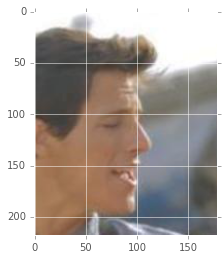

In [131]:
# Take a look at one of the files
ind = 2
img = plt.imread(files[ind])
plt.imshow(img)

In [24]:
img.shape
# --> 218 x 178 image size (w 3 color channels)

(218, 178, 3)

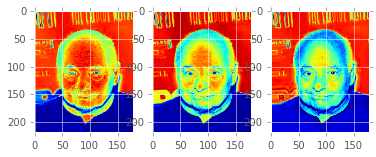

In [27]:
for i in range(img.shape[2]):
    plt.subplot(1,img.shape[2],i+1)
    plt.imshow(img[:, :, i])

In [30]:
# Get actual images
saveDir = '/Users/kateniehaus/Dropbox/machine learning/Deep/Kadenze'
numImgs = 100
imgs = get_celeb_imgs(saveDir, numImgs)

https://s3.amazonaws.com/cadl/celeb-align/000001.jpg
https://s3.amazonaws.com/cadl/celeb-align/000002.jpg
https://s3.amazonaws.com/cadl/celeb-align/000003.jpg
https://s3.amazonaws.com/cadl/celeb-align/000004.jpg
https://s3.amazonaws.com/cadl/celeb-align/000005.jpg
https://s3.amazonaws.com/cadl/celeb-align/000006.jpg
https://s3.amazonaws.com/cadl/celeb-align/000007.jpg
https://s3.amazonaws.com/cadl/celeb-align/000008.jpg
https://s3.amazonaws.com/cadl/celeb-align/000009.jpg
https://s3.amazonaws.com/cadl/celeb-align/000010.jpg
https://s3.amazonaws.com/cadl/celeb-align/000011.jpg
https://s3.amazonaws.com/cadl/celeb-align/000012.jpg
https://s3.amazonaws.com/cadl/celeb-align/000013.jpg
https://s3.amazonaws.com/cadl/celeb-align/000014.jpg
https://s3.amazonaws.com/cadl/celeb-align/000015.jpg
https://s3.amazonaws.com/cadl/celeb-align/000016.jpg
https://s3.amazonaws.com/cadl/celeb-align/000017.jpg
https://s3.amazonaws.com/cadl/celeb-align/000018.jpg
https://s3.amazonaws.com/cadl/celeb-align/0000

In [31]:
data = np.array(imgs)
data.shape

(100, 218, 178, 3)

orig
[ 129.04  119.72  115.2 ]
w rounding
[129 119 115]


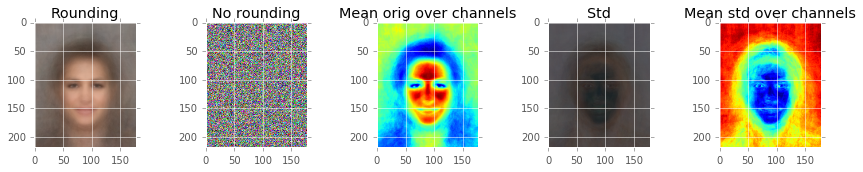

In [48]:
# Look at mean image
mean_img = np.mean(data, axis=0)

# Look at image std
std_img = np.std(data, axis=0)

# show image
plt.figure(figsize=[12,4])
numCols = 5
# rounded mean
plt.subplot(1,numCols,1)
plt.imshow(mean_img.astype(np.uint8))
plt.title('Rounding')
# orig mean
plt.subplot(1,numCols,2)
plt.imshow(mean_img[:,:,:])
plt.title('No rounding')
# first channel for orig mean
plt.subplot(1,numCols,3)
plt.imshow(np.mean(mean_img, axis=2))
plt.title('Mean orig over channels')
# std
plt.subplot(1,numCols,4)
plt.imshow(std_img.astype(np.uint8))
plt.title('Std')
# average std over channels
plt.subplot(1,numCols,5)
plt.imshow(np.mean(std_img, axis=2))
plt.title('Mean std over channels')
#
plt.tight_layout()

print('orig')
print(mean_img[0][0])
print('w rounding')
print(mean_img.astype(np.uint8)[0][0])

In [50]:
# Look at distribution of values
# flatten image
flattened = data.ravel()
flattened.shape

(11641200,)

(array([ 633343.,  290261.,  301303.,  316857.,  304913.,  310851.,
         306404.,  310375.,  299454.,  284401.,  309275.,  220902.,
         212458.,  216027.,  211210.,  212511.,  211862.,  208697.,
         211621.,  212285.,  247085.,  207177.,  206209.,  210212.,
         211371.,  205634.,  203739.,  210472.,  217538.,  206487.,
         244887.,  206410.,  200247.,  199271.,  200421.,  205231.,
         187536.,  187626.,  206685.,  224671.,  234864.,  198905.,
         200580.,  185469.,  192329.,  176794.,  154059.,  127521.,
         115896.,  280864.]),
 array([   0. ,    5.1,   10.2,   15.3,   20.4,   25.5,   30.6,   35.7,
          40.8,   45.9,   51. ,   56.1,   61.2,   66.3,   71.4,   76.5,
          81.6,   86.7,   91.8,   96.9,  102. ,  107.1,  112.2,  117.3,
         122.4,  127.5,  132.6,  137.7,  142.8,  147.9,  153. ,  158.1,
         163.2,  168.3,  173.4,  178.5,  183.6,  188.7,  193.8,  198.9,
         204. ,  209.1,  214.2,  219.3,  224.4,  229.5,  234.6,  2

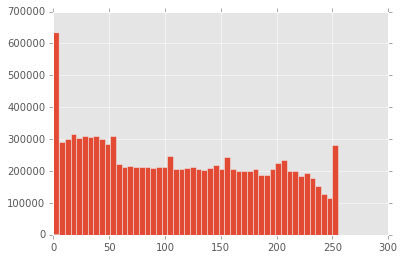

In [52]:
numBins = 50
plt.hist(flattened, numBins)

(array([  1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.00000000e+00,
          4.10000000e+01,   7.60000000e+01,   1.92000000e+02,
          3.69000000e+02,   7.08000000e+02,   1.04200000e+03,
          1.36700000e+03,   1.74800000e+03,   3.52200000e+03,
          4.58400000e+03,   4.57600000e+03,   4.50300000e+03,
          4.46200000e+03,   4.37600000e+03,   4.40100000e+03,
          4.44800000e+03,   4.50400000e+03,   4.62400000e+03,
          4.88300000e+03,   5.20400000e+03,   6.05100000e+03,
          8.06600000e+03,   7.91800000e+03,   1.01150000e+04,
          1.12240000e+04,   5.72100000e+03,   2.97100000e+03,
          1.94600000e+03,   1.16700000e+03,   7.37000000e+02,
          4.57000000e+02,   2.08000000e+02,   9.90000000e+01,
          5.00000000e+01,   1.50000000e+01,   8.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
        

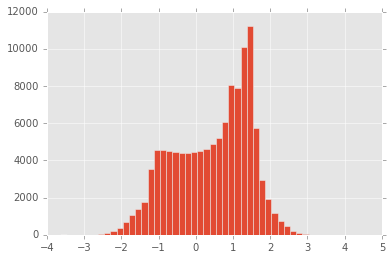

In [55]:
# Normalize
norm_data = ((data[0] - mean_img) / std_img).ravel()
plt.hist(norm_data, numBins)

## Now, to tensorflow

In [59]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace_3:0", shape=(100,), dtype=float32)


In [60]:
# Get the default way TF represents this info
g = tf.get_default_graph()

In [61]:
# can look at all operations
print([op.name for op in g.get_operations()])

[u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace', u'LinSpace_1/start', u'LinSpace_1/stop', u'LinSpace_1/num', u'LinSpace_1', u'LinSpace_2/start', u'LinSpace_2/stop', u'LinSpace_2/num', u'LinSpace_2', u'LinSpace_3/start', u'LinSpace_3/stop', u'LinSpace_3/num', u'LinSpace_3']


In [62]:
# can request particular output by asking by name
print(g.get_tensor_by_name('LinSpace' + ':0'))

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [63]:
# Sessions

# Create a session:
sess = tf.Session()

# Tell session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# Can close the session after we're done:
sess.close()

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

In [64]:
# Or, can grab a specific graph
g2 = tf.Graph()
sess = tf.Session(graph=g2)
sess.close()

In [67]:
# Interactive sessions
sess = tf.InteractiveSession()
x.eval()

# [will leave open...]

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

In [65]:
# Getting shapes
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


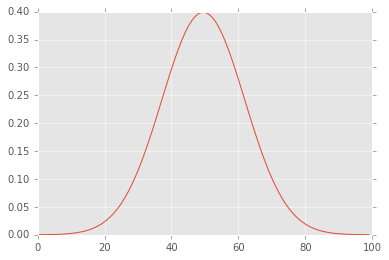

In [69]:
# Making mathematical equations
x = tf.linspace(-4.0, 4.0, 100)

# Gaussian
mean = 0.0
sigma = 1.0
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

z_res = z.eval()
plt.plot(z_res)

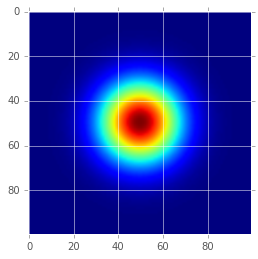

In [80]:
# Store the number of values in Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Multiply the two to get a 2d gaussian
z_asVec = tf.reshape(z, [ksize, 1])
#z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))
z_2d = tf.matmul(z_asVec, tf.transpose(z_asVec))

# Execute the graph
plt.imshow(z_2d.eval())

### Apply convolution

(512, 512)


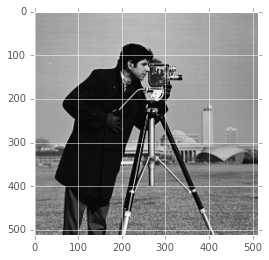

In [77]:
# Get new image data
from skimage import data
img1 = data.camera().astype(np.float32)
plt.imshow(img1, cmap='gray')
print(img1.shape)

In [79]:
# re-size data so TF can handle it (i.e., N_images x H x W x channels) --> here is [1,h,w,1]
img_4d = tf.reshape(img1, [1, img1.shape[0], img1.shape[1], 1])
print(img_4d)
print(img_4d.get_shape())
print(img_4d.get_shape().as_list())

Tensor("Reshape_4:0", shape=(1, 512, 512, 1), dtype=float32)
(1, 512, 512, 1)
[1, 512, 512, 1]


In [81]:
# Reshape the 2d kernel to tensorflow's required 4d format: H x W x I x O
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


(100,)


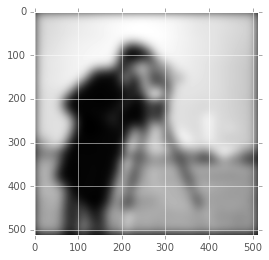

In [82]:
# Convolve
# padding options: 'SAME' (padded to make in and out the same size) and 'VALID' (no padding used)
my_strides = [1,1,1,1]
convolved = tf.nn.conv2d(img_4d, z_4d, strides=my_strides, padding='SAME')
res_conv = convolved.eval()
print(res.shape)
plt.imshow(res_conv[0, :, :, 0], cmap='gray')

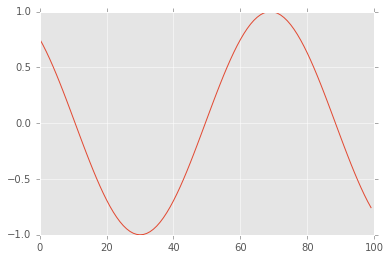

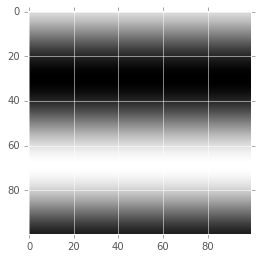

In [85]:
# Make Gabor kernel
ys = tf.sin(x)
plt.figure()
plt.plot(ys.eval())
# reshape
ys = tf.reshape(ys, [ksize, 1])
# repmat
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.figure()
plt.imshow(wave.eval(), cmap='gray')

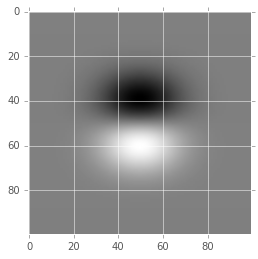

In [86]:
gabor = tf.mul(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

### Apply kernel in typical TF notation

i.e., using placeholders

In [122]:
# Make image placeholder
img_ph = tf.placeholder(tf.float32, shape=[None, None], name='img_ph')

# expand dimensions
img_3d = tf.expand_dims(img_ph, 2)   # expand dimension to dimension 2
print(img_3d.get_shape())
img_4d = tf.expand_dims(img_3d, 0)  # expand dimension to dimension 0
print(img_4d.get_shape().as_list())

(?, ?, 1)
[1, None, None, 1]


In [123]:
# Make Gabor parameter placeholders:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

In [124]:
# re-do operations with placeholders

# Make Gaussian kernel
startX = -4.0
endX = 4.0
x = tf.linspace(startX, endX, ksize)
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

z_2d = tf.matmul(
  tf.reshape(z, tf.pack([ksize, 1])),   # tf.pack seems to just make a vector of input data
  tf.reshape(z, tf.pack([1, ksize])))

# Make Gabor kernel
ys = tf.sin(x)
ys = tf.reshape(ys, tf.pack([ksize, 1]))    
ones = tf.ones(tf.pack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.mul(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.pack([ksize, ksize, 1, 1]))

In [125]:
# Convolve:
my_strides = [1,1,1,1]
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=my_strides, padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

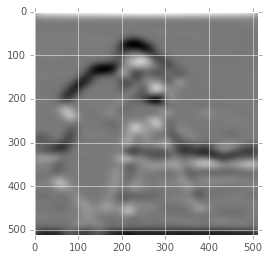

In [127]:
# To evaluate, must feed info for placeholders
out1 = convolved_img.eval(feed_dict={img_ph:data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(out1, cmap='gray')

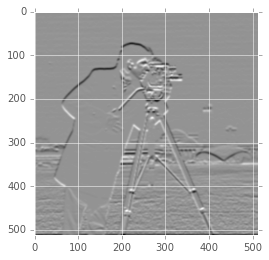

In [128]:
res = convolved_img.eval(feed_dict={
    img_ph: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')

In [ ]:
def imcrop_tosquare(img):
    """Make any image a square image.
    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.
    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    size = np.min(img.shape[:2])
    extra = img.shape[:2] - size
    crop = img
    for i in np.flatnonzero(extra):
        crop = np.take(crop, extra[i] // 2 + np.r_[:size], axis=i)
    return crop